In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

In [2]:
from src.experiments.ease_sweep import run_ease_lambda_sweep

df_results = run_ease_lambda_sweep(
    lambdas=[50, 100, 150, 200, 250, 300, 400, 500, 700, 900, 1000],
    output_csv='ease_lambda_sweep_offline.csv'
)
df_results

[INFO] Running EASE sweep with 11 lambdas...
[INFO] Evaluating lambda = 50 | progress: 0.0 %
[INFO] Evaluating lambda = 100 | progress: 9.09 %
[INFO] Evaluating lambda = 150 | progress: 18.18 %
[INFO] Evaluating lambda = 200 | progress: 27.27 %
[INFO] Evaluating lambda = 250 | progress: 36.36 %
[INFO] Evaluating lambda = 300 | progress: 45.45 %
[INFO] Evaluating lambda = 400 | progress: 54.55 %
[INFO] Evaluating lambda = 500 | progress: 63.64 %
[INFO] Evaluating lambda = 700 | progress: 72.73 %
[INFO] Evaluating lambda = 900 | progress: 81.82 %
[INFO] Evaluating lambda = 1000 | progress: 90.91 %


,ndcg,recall,user_coverage,item_gini,publisher_gini,item_coverage,intra_list_similarity,novelty,lambda
0,0.229686,0.41675,1.0,0.808946,None,0.097757,None,None,50
1,0.232489,0.42250,1.0,0.811508,None,0.090224,None,None,100
2,0.233797,0.42625,1.0,0.809927,None,0.083547,None,None,150
3,0.233676,0.42475,1.0,0.807166,None,0.077898,None,None,200
4,0.232853,0.42275,1.0,0.806163,None,0.073960,None,None,250
5,0.230748,0.41975,1.0,0.804540,None,0.070536,None,None,300
6,0.230139,0.42000,1.0,0.800819,None,0.064886,None,None,400
7,0.227359,0.41575,1.0,0.797714,None,0.060435,None,None,500
8,0.224533,0.40900,1.0,0.794351,None,0.054614,None,None,700
9,0.220591,0.40300,1.0,0.786560,None,0.049478,None,None,900


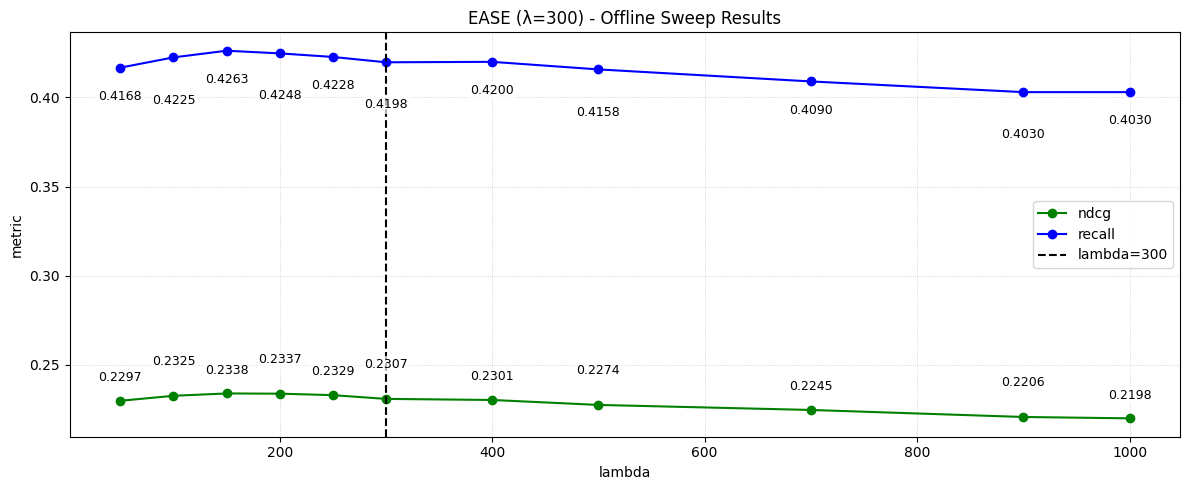

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

df_results.plot(x="lambda", y="ndcg", marker="o", ax=ax, label="ndcg", color='green')
df_results.plot(x="lambda", y="recall", marker="o", ax=ax, label="recall", color='blue')
# df_results.plot(x="lambda", y="item_gini", marker="o", ax=ax, label="gini")
# df_results.plot(x="lambda", y="item_coverage", marker="o", ax=ax, label="coverage")

ndcg_offsets = [12, 20, 12, 20, 12, 20, 12, 20, 12, 20, 12]
recall_offsets = [-16, -26, -16, -26, -16, -26, -16, -26, -16, -26, -16]

for i, (x, y) in enumerate(zip(df_results["lambda"], df_results["ndcg"])):
    ax.annotate(
        f"{y:.4f}",
        (x, y),
        textcoords="offset points",
        xytext=(0, ndcg_offsets[i % len(ndcg_offsets)]),
        ha="center",
        va="bottom",
        fontsize=9,
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1.5),
    )

for i, (x, y) in enumerate(zip(df_results["lambda"], df_results["recall"])):
    ax.annotate(
        f"{y:.4f}",
        (x, y),
        textcoords="offset points",
        xytext=(0, recall_offsets[i % len(recall_offsets)]),
        ha="center",
        va="top",
        fontsize=9,
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1.5),
    )
ax.set(title="EASE (λ=300) - Offline Sweep Results")
ax.axvline(300, color="k", linestyle="--", label="lambda=300")
ax.grid(color="gray", linestyle=":", linewidth=0.5, alpha=0.5)
ax.set_xlabel("lambda")
ax.set_ylabel("metric")
ax.legend()

plt.tight_layout()
plt.show()


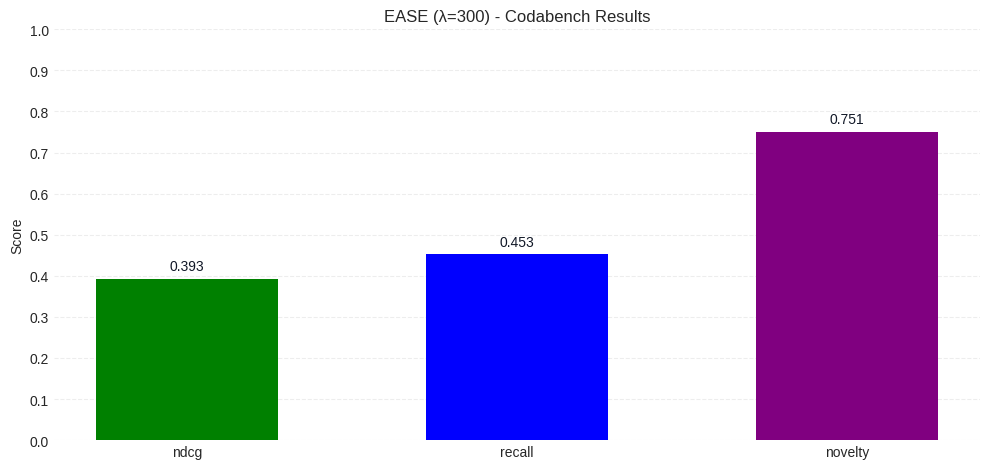

In [10]:
# Codabench submissions @ λ=300 (baseline for novelty experiments)
focuses = ["ndcg", "recall", "novelty"]
results = {"user_coverage": 1.0, "item_coverage": 0.12871054792913295, "item_gini": 0.8868183571836586, "publisher_gini": 0.8835835027587287, "recall": 0.4526789345330127, "ndcg": 0.39267031425710297, "ils": 0.2948679174429951, "novelty": 0.7507889761731898}

plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(10, 4.8))

vals = [results[m] for m in focuses]
bars = ax.bar(focuses, vals, color=["green", "blue", "purple"], width=0.55, edgecolor="none")

ax.set(title="EASE (λ=300) - Codabench Results", ylabel="Score", ylim=(0, 1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.grid(axis="y", linestyle="--", linewidth=0.8, alpha=0.35)
ax.grid(axis="x", visible=False)
for s in ax.spines.values():
    s.set_visible(False)

ax.bar_label(bars, labels=[f"{v:.3f}" for v in vals], padding=4, fontsize=10, color="#111827")

plt.tight_layout()
plt.show()


#### Observations
- note: this is based on a subsample of full data (3000 users), this is done for speed. This takes me about 27.33 per iteration, and we tested on 24 lambdas, so it takes about 10 minutes.
- small lambda (0–25): unstable, noise
- medium lambda (100–300): more stable, lower noise
- large lambda (500+): higher item-gini, lower coverage, decreasing ndcg/recall
- best ndcg/recall around lambda=25-150

#### Explanations
- item-gini increase with lambda, because higher lambda values make EASE more popularly biased. Fewer items dominate → gini increases.
- item-coverage decreases with lambda, because EASE favors popular items.

#### Anomalies
- results differ a lot compared to codabench.
    - ndgc: 0.005 vs 0.24
    - recall: 0.008 vs 0.45
- possible reasons:
    - subsampling of users for speed
    - The fold-in / out split is different
        -  codabench uses one holdout per user (likely), we use 80% fold-in-ratio as we did in lecture 2.
## Conclusion
- lambda=25 gives the best recall and best ndgc in this experiment.
- λ=100–300 gives the most stable behavior, good for comparing novelty models later
- I will continue with λ=100.